In [1]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [4]:
data = pd.read_csv('FIFA_Players_dataset.csv.',na_values = [None, 'NaN','Nothing'], header = 0,error_bad_lines=False) 

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head(5)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data=data.drop(['Photo', 'Flag', 
                'Club Logo', 'CAM','CB','CDM','CF','CM','LAM','LB','LCB','LDM','LCM','LF','LM','LS','LW','LWB','RAM','RB','RCB','RCM','RDM','RF','RM','RS','RW','RWB','ST'], axis=1)

In [7]:
data['W'] = data['Wage'].str.extract('(\d+)', expand=False)

In [8]:
data['W']

0        565
1        565
2        280
3        510
4        230
5        355
6        215
7        295
8        340
9        275
10       310
11       285
12       190
13       265
14       340
15       370
16       325
17       225
18       110
19       215
20        82
21       150
22       225
23       165
24       210
25       215
26       125
27       215
28       265
29       165
        ... 
17951      1
17952      1
17953      1
17954      1
17955      1
17956      1
17957      1
17958      1
17959      1
17960      1
17961      5
17962      1
17963      1
17964      1
17965      1
17966      1
17967      1
17968      1
17969      1
17970      1
17971      2
17972      1
17973      1
17974      1
17975      1
17976      1
17977      1
17978      1
17979      1
17980      1
Name: W, Length: 17981, dtype: object

In [9]:
data['Wage']=data['W']

In [10]:
data.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'Value', 'Wage', 'Special', 'Acceleration', 'Aggression',
       'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys', 'ID',
       'Preferred Positions', 'W'],
      dtype='object')

In [11]:
data=data.drop(['W'], axis=1)

In [12]:
data.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'Value', 'Wage', 'Special', 'Acceleration', 'Aggression',
       'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys', 'ID',
       'Preferred Positions'],
      dtype='object')

In [13]:
data.head(n=5)

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,ID,Preferred Positions
0,0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,565,2228,...,94,23,91,92,31,80,85,88,20801,ST LW
1,1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,565,2154,...,85,26,87,73,28,59,90,85,158023,RW
2,2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,280,2100,...,80,33,90,78,24,53,80,83,190871,LW
3,3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,510,2291,...,87,38,77,89,45,80,84,88,176580,ST
4,4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,230,1493,...,25,11,61,44,10,83,70,11,167495,GK


In [14]:
data['Wage'] = data['Wage'].astype(int)

In [15]:
df_age = pd.DataFrame(np.random.randint(low=0, high=9, size=(100, 1)),columns = ['age'])
 #Weirdly worked, recheck with value code the next time
 
#set up bins
bin = [0,100,200,300,400,500,600]
#use pd.cut function can attribute the values into its specific bins
category = pd.cut(data.Wage,bin)
category = category.to_frame()
category.columns = ['range']
#concatenate age and its bin
df_new = pd.concat([data,category],axis = 1)

In [16]:
df_new.head(n=8)

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,ID,Preferred Positions,range
0,0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,565,2228,...,23,91,92,31,80,85,88,20801,ST LW,"(500, 600]"
1,1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,565,2154,...,26,87,73,28,59,90,85,158023,RW,"(500, 600]"
2,2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,280,2100,...,33,90,78,24,53,80,83,190871,LW,"(200, 300]"
3,3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,510,2291,...,38,77,89,45,80,84,88,176580,ST,"(500, 600]"
4,4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,230,1493,...,11,61,44,10,83,70,11,167495,GK,"(200, 300]"
5,5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,€92M,355,2143,...,19,83,79,42,84,78,87,188545,ST,"(300, 400]"
6,6,De Gea,26,Spain,90,92,Manchester United,€64.5M,215,1458,...,13,58,40,21,64,68,13,193080,GK,"(200, 300]"
7,7,E. Hazard,26,Belgium,90,91,Chelsea,€90.5M,295,2096,...,22,87,79,27,65,86,79,183277,LW,"(200, 300]"


In [17]:
df_new.tail(n=5)

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,ID,Preferred Positions,range
17976,17976,A. Kelsey,17,England,46,63,Scunthorpe United,€50K,1,755,...,10,32,28,11,50,26,6,237463,GK,"(0, 100]"
17977,17977,B. Richardson,47,England,46,46,Wycombe Wanderers,€0,1,832,...,13,25,32,12,47,17,12,11728,GK,"(0, 100]"
17978,17978,J. Young,17,Scotland,46,61,Swindon Town,€60K,1,1194,...,14,51,33,17,32,37,33,231381,ST,"(0, 100]"
17979,17979,J. Lundstram,18,England,46,64,Crewe Alexandra,€60K,1,1302,...,47,58,49,48,46,51,25,238813,CM,"(0, 100]"
17980,17980,L. Sackey,18,Ghana,46,64,Scunthorpe United,€50K,1,1031,...,43,49,55,44,67,22,19,238308,ST CB,"(0, 100]"


In [18]:
data=df_new

In [19]:
#salary regex

In [20]:
data['Value'] = data['Value'].str.extract('(\d+)', expand=False)

In [21]:
data['Value'] = data['Value'].astype(int)

In [22]:
data['Value_Less_Than'] = pd.cut(x=data['Value'], bins=[0,20,40,60,80,100,120,140,160], labels=['20', '40', '60','80','100','120','140','160'])

In [23]:
data.head(n=6)

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,ID,Preferred Positions,range,Value_Less_Than
0,0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95,565,2228,...,91,92,31,80,85,88,20801,ST LW,"(500, 600]",100
1,1,L. Messi,30,Argentina,93,93,FC Barcelona,105,565,2154,...,87,73,28,59,90,85,158023,RW,"(500, 600]",120
2,2,Neymar,25,Brazil,92,94,Paris Saint-Germain,123,280,2100,...,90,78,24,53,80,83,190871,LW,"(200, 300]",140
3,3,L. Suárez,30,Uruguay,92,92,FC Barcelona,97,510,2291,...,77,89,45,80,84,88,176580,ST,"(500, 600]",100
4,4,M. Neuer,31,Germany,92,92,FC Bayern Munich,61,230,1493,...,61,44,10,83,70,11,167495,GK,"(200, 300]",80
5,5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,92,355,2143,...,83,79,42,84,78,87,188545,ST,"(300, 400]",100


In [24]:
df_matrix = pd.DataFrame.as_matrix(data[['Age','Overall','Value','Potential']])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [25]:
cluster_model = KMeans(n_clusters=20, random_state=10)
#cluster_model = KMeans(n_clusters=2, random_state=3)

In [26]:
print(cluster_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)


In [27]:
cluster_model.fit(df_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [28]:
cluster_model.labels_

array([ 0,  0,  0, ..., 15, 15, 15])

In [29]:
cluster_labels = cluster_model.fit_predict(df_matrix)

In [30]:
i=data

In [31]:
i.head(6)

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,ID,Preferred Positions,range,Value_Less_Than
0,0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95,565,2228,...,91,92,31,80,85,88,20801,ST LW,"(500, 600]",100
1,1,L. Messi,30,Argentina,93,93,FC Barcelona,105,565,2154,...,87,73,28,59,90,85,158023,RW,"(500, 600]",120
2,2,Neymar,25,Brazil,92,94,Paris Saint-Germain,123,280,2100,...,90,78,24,53,80,83,190871,LW,"(200, 300]",140
3,3,L. Suárez,30,Uruguay,92,92,FC Barcelona,97,510,2291,...,77,89,45,80,84,88,176580,ST,"(500, 600]",100
4,4,M. Neuer,31,Germany,92,92,FC Bayern Munich,61,230,1493,...,61,44,10,83,70,11,167495,GK,"(200, 300]",80
5,5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,92,355,2143,...,83,79,42,84,78,87,188545,ST,"(300, 400]",100


In [32]:
i['pred'] = cluster_labels

E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


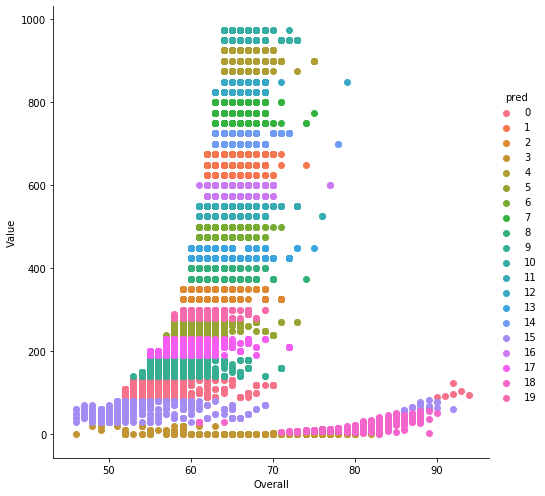

In [33]:
sns.FacetGrid(i, hue="pred", size=7).map(plt.scatter, "Overall", "Value").add_legend()

In [34]:
#might have to convert string to int to make it all work properly

In [35]:
import pandas as pd
from sklearn import datasets ## imports datasets from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn import model_selection

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score

In [36]:
i.head(n=2)

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Stamina,Standing tackle,Strength,Vision,Volleys,ID,Preferred Positions,range,Value_Less_Than,pred
0,0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95,565,2228,...,92,31,80,85,88,20801,ST LW,"(500, 600]",100,0
1,1,L. Messi,30,Argentina,93,93,FC Barcelona,105,565,2154,...,73,28,59,90,85,158023,RW,"(500, 600]",120,0


In [41]:
i['Growth'] = i['Potential'] - i['Overall'] 

In [42]:
i.tail(n=5)

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Standing tackle,Strength,Vision,Volleys,ID,Preferred Positions,range,Value_Less_Than,pred,Growth
17976,17976,A. Kelsey,17,England,46,63,Scunthorpe United,50,1,755,...,11,50,26,6,237463,GK,"(0, 100]",60,15,17
17977,17977,B. Richardson,47,England,46,46,Wycombe Wanderers,0,1,832,...,12,47,17,12,11728,GK,"(0, 100]",NaN,3,0
17978,17978,J. Young,17,Scotland,46,61,Swindon Town,60,1,1194,...,17,32,37,33,231381,ST,"(0, 100]",60,15,15
17979,17979,J. Lundstram,18,England,46,64,Crewe Alexandra,60,1,1302,...,48,46,51,25,238813,CM,"(0, 100]",60,15,18
17980,17980,L. Sackey,18,Ghana,46,64,Scunthorpe United,50,1,1031,...,44,67,22,19,238308,ST CB,"(0, 100]",60,15,18


In [43]:
# define the data/predictors as the pre-set feature names  
X = pd.DataFrame(data,columns=["Age","Growth","Overall","Value"])

#X = pd.DataFrame(data,columns=["t","force"])

Y = pd.DataFrame(data, columns=["Potential"])

In [44]:
X.head(n=2)

,Age,Growth,Overall,Value
0,32,0,94,95
1,30,0,93,105


In [45]:
Y.head(n=2)

,Potential
0,94
1,93


In [46]:
type(data)

pandas.core.frame.DataFrame

In [47]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .25, random_state=25) #25% hold out for testing

In [ ]:
#MLP Algorithm

In [48]:
mlr = MLPRegressor(activation = 'logistic',solver='lbfgs', alpha=0.0001,
                     random_state=1)

In [49]:
mlr.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [50]:
Y_pred = mlr.predict(X_test) #predict house prices

In [51]:
from sklearn.metrics import r2_score

In [52]:
print(r2_score(y_test,Y_pred))

0.85099478658203


In [53]:
from sklearn.metrics import mean_squared_error

In [55]:
clf = MLPRegressor(hidden_layer_sizes=(15,), max_iter=100000) 

In [56]:
clf.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(15,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=100000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [57]:
Y_pred = clf.predict(X_test) 

In [58]:
mean_squared_error(y_test,Y_pred)

0.010262897137289825

In [59]:
print(r2_score(y_test,Y_pred))

0.9997239388111717


In [60]:
import numpy as np

np.c_[y_test, Y_pred]

array([[83.        , 82.98319622],
       [76.        , 75.96867403],
       [69.        , 69.03616574],
       ...,
       [75.        , 74.96892437],
       [70.        , 69.97890254],
       [79.        , 78.96208269]])

In [61]:
d=np.c_[y_test, Y_pred]

In [67]:
type(Y_pred)

numpy.ndarray

In [68]:
i['Predicted_Potential']= pd.Series(Y_pred) 
 

In [69]:
i['Predicted_Potential']

0        82.983196
1        75.968674
2        69.036166
3        61.047307
4        73.968875
5        69.984344
6        78.957961
7        76.981891
8        68.995835
9        78.940106
10       65.996579
11       74.971364
12       67.013271
13       67.986418
14       67.976547
15       68.998413
16       65.017725
17       68.010998
18       63.992224
19       68.971992
20       71.971755
21       67.000635
22       77.024025
23       69.990645
24       71.977928
25       64.025438
26       76.961835
27       69.994403
28       69.978692
29       66.004170
           ...    
17951          NaN
17952          NaN
17953          NaN
17954          NaN
17955          NaN
17956          NaN
17957          NaN
17958          NaN
17959          NaN
17960          NaN
17961          NaN
17962          NaN
17963          NaN
17964          NaN
17965          NaN
17966          NaN
17967          NaN
17968          NaN
17969          NaN
17970          NaN
17971          NaN
17972       

In [85]:
i['Predicted_Potential'] = i['Predicted_Potential'].fillna(0)

In [86]:
i['Predicted_Potential']=i['Predicted_Potential'].round().astype(int) 

In [88]:
i['Predicted_Potential'].head()

0    83
1    76
2    69
3    61
4    74
Name: Predicted_Potential, dtype: int32